In [1]:
import pandas as pd
import numpy as np
import datetime


In [2]:
train = pd.read_csv('./output/train.csv')    
test = pd.read_csv('./output/test.csv')    
test2 = pd.read_csv('./output/test2.csv')

def within_measure(x, y):
    #  3750901.5068 ≤ 𝑥 ≤ 3770901.5068
    #  −19268905.6133 ≤ 𝑦 ≤ −19208905.6133
    if 3750901.5068 <= x and x <= 3770901.5068 and -19268905.6133 <= y and y <= -19208905.6133:
        return 1
    else:
        return 0

train = train.append(test[test.x_exit==test.x_exit])
cols=['hash','trajectory_id','x_exit','y_exit',
      'distance_to_city'
     ]   
x_train = train.drop(columns=cols)
x_test = test2.drop(columns=cols)



y_train=pd.DataFrame()
#y_train=train[['x_exit','y_exit']]
y_train=[within_measure(x, y) for x,y in zip(train.x_exit.values,train.y_exit.values)]
y_train=pd.DataFrame({'y':y_train})

In [3]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983684 entries, 0 to 983683
Data columns (total 1 columns):
y    983684 non-null int64
dtypes: int64(1)
memory usage: 7.5 MB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983684 entries, 0 to 202935
Data columns (total 28 columns):
hash                983684 non-null object
trajectory_id       983684 non-null object
time_entry          983684 non-null int64
time_exit           983684 non-null int64
vmax                983684 non-null float64
vmin                983684 non-null float64
vmean               983684 non-null float64
x_entry             983684 non-null float64
y_entry             983684 non-null float64
x_exit              983684 non-null float64
y_exit              983684 non-null float64
first               983684 non-null bool
last                983684 non-null bool
x_req               983684 non-null float64
y_req               983684 non-null float64
x_start             983684 non-null float64
y_start             983684 non-null float64
distance            983684 non-null float64
time_start          983684 non-null int64
time_delta          983684 non-null int64
time_total          98368

In [5]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import matplotlib.patches as patches

_min_samples=40
_eps=190

columns=['x_entry','y_entry',
         #'distance_to_city',
        #'distance',
        # 'vmax','vmean','vmin',
        ]
data=train[columns]
trainend=np.shape(data)[0]
#data=data.append(test[columns])
#testend=np.shape(data)[0]
data=data.append(test2[columns])

#c = DBSCAN(eps=_eps,min_samples=_min_samples,n_jobs=-1).fit_predict(data)
c=MiniBatchKMeans(n_clusters=2000,max_iter=100, batch_size=1000,reassignment_ratio=0.9, verbose=True,random_state=532515715).fit_predict(data)

labels=list(np.unique(c))
clusters=len(labels)
train_c=c[:trainend]
#test_c=c[trainend:testend]
test2_c=c[trainend:]

proba=[]
for c in labels:
    mean = np.mean(y_train[train_c==c].y)
    mean= mean #+ (0.2*(1-mean))
    proba.append(mean)
c_proba = pd.DataFrame({'c':labels,'proba':proba})


x_train['cluster']=train_c
x_test['cluster']=test2_c

Init 1/3 with method: k-means++
Inertia for init 1/3: 928623411.875000
Init 2/3 with method: k-means++
Inertia for init 2/3: 963045095.500000
Init 3/3 with method: k-means++
Inertia for init 3/3: 1024520226.062500
Minibatch iteration 1/101800: mean batch inertia: 740027.084625, ewa inertia: 740027.084625 
Minibatch iteration 2/101800: mean batch inertia: 765352.968687, ewa inertia: 740076.879914 
Minibatch iteration 3/101800: mean batch inertia: 722824.152313, ewa inertia: 740042.957917 
Minibatch iteration 4/101800: mean batch inertia: 768169.305312, ewa inertia: 740098.259426 
Minibatch iteration 5/101800: mean batch inertia: 677712.924250, ewa inertia: 739975.598523 
Minibatch iteration 6/101800: mean batch inertia: 655061.472500, ewa inertia: 739808.641925 
Minibatch iteration 7/101800: mean batch inertia: 682506.939938, ewa inertia: 739695.976368 
Minibatch iteration 8/101800: mean batch inertia: 731521.947125, ewa inertia: 739679.904742 
Minibatch iteration 9/101800: mean batch i

In [6]:
def cproba(df):
    
    def fnc(row):
        return proba[row.cluster]
        
    df['cluster']=df.apply(fnc,axis=1)
cproba(x_train)
x_train[:20]

,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,first,last,x_req,...,time_start,time_delta,time_total,city_start,city_now,city_was,x_dir,y_dir,len,cluster
0,25471,25712,0.000000,0.000000,0.000000,3.751014e+06,-1.909398e+07,True,False,3.751014e+06,...,25471,241,241,0,0,0,-687.954453,-42359.276973,1,0.044405
1,26434,26742,0.000000,0.000000,0.000000,3.743937e+06,-1.932247e+07,False,False,3.751014e+06,...,25471,308,1271,0,0,0,-687.954453,-42359.276973,2,0.030516
2,28412,29005,0.000000,0.000000,0.000000,3.744868e+06,-1.929356e+07,False,False,3.743937e+06,...,25471,593,3534,0,0,0,1037.497654,2803.848719,3,0.024209
3,29870,31043,0.000000,0.000000,0.000000,3.744880e+06,-1.929229e+07,False,False,3.744868e+06,...,25471,1173,5572,0,0,0,-52.320161,723.769955,4,0.023419
4,52689,52689,0.000000,0.000000,0.000000,3.744909e+06,-1.928558e+07,False,False,3.744880e+06,...,25471,0,27218,0,0,0,-71.244474,1803.169939,5,0.004946
5,54151,55113,0.000000,0.000000,0.000000,3.744945e+06,-1.928183e+07,False,True,3.744909e+06,...,25471,962,29642,0,0,0,0.000000,0.000000,6,0.002343
6,52163,52163,0.000000,0.000000,0.000000,3.749450e+06,-1.926506e+07,True,False,3.749450e+06,...,52163,0,0,0,0,0,0.000000,0.000000,1,0.123839
7,52789,52789,0.000000,0.000000,0.000000,3.749090e+06,-1.926726e+07,False,False,3.749450e+06,...,52163,0,626,0,0,0,0.000000,0.000000,2,0.054545
8,53414,53414,0.507809,0.507809,0.507809,3.749042e+06,-1.926632e+07,False,False,3.749090e+06,...,52163,0,1251,0,0,0,0.000000,0.000000,3,0.054545
9,54032,55788,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,False,True,3.749042e+06,...,52163,1756,3625,0,0,0,0.000000,0.000000,4,0.123839


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


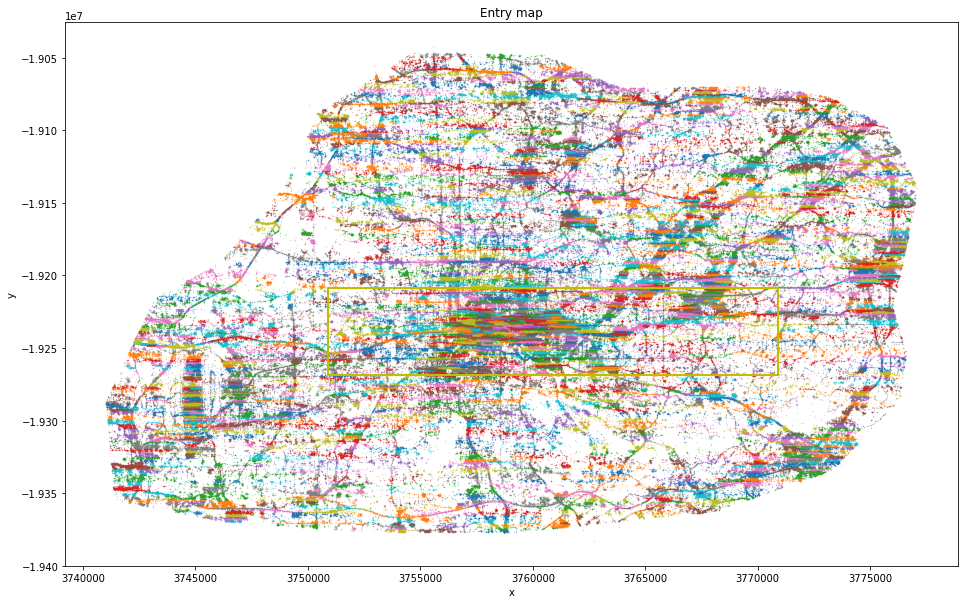

In [7]:
data=train[['x_entry','y_entry']]
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    ax.scatter(data[data.c==c].x_entry.values,data[data.c==c].y_entry.values,s=.05, alpha=0.5)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()


C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


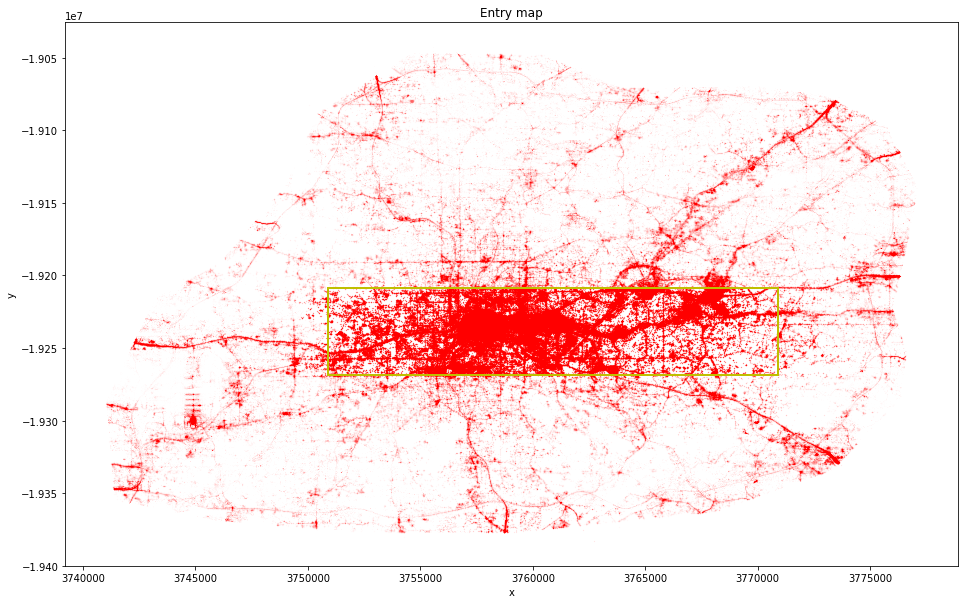

In [8]:



data=train[['x_entry','y_entry']]

#train_c=kmeans.predict(data)
data['c']=train_c

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(16)

# Plot
for c in labels:
    #print(str(c_proba[c_proba.c==c]['proba'].values[0]))
    ax.scatter(data[data.c==c].x_entry.values,
               data[data.c==c].y_entry.values,
               #c=str(c_proba[c_proba.c==c]['proba'].values[0]),
               c="r",
               alpha=str(c_proba[c_proba.c==c]['proba'].values[0]),
               s=.05)
    
# Create a Rectangle patch
rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)    

ax.set(xlabel='x', ylabel='y',
       title='Entry map')

plt.show()

In [9]:
import lightgbm as lgb

# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_boost_round':800,
    'num_leaves' : 1000,
    #'max_depth':8,
    #'min_data_in_leaf':5,
    #'feature_fraction': 0.64, 
    #'bagging_fraction': 0.8, 
    #'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss',
    #'seed':43676214075319,  
    'num_threads':8
    }

devide_clusters = False


def naklastry():
    pred = pd.DataFrame({'c':test2_c,'target':test2_c})

    for c in labels:
        xc_train=x_train[train_c==c]
        yc_train=y_train[train_c==c].y.values
        xc_test=x_test[test2_c==c]
        if len(xc_test)==0:
            continue
        print(len(xc_train),len(xc_test))
        d_train = lgb.Dataset(xc_train, label=yc_train)
        clf = lgb.train(params, d_train)
        
        #Prediction
        def add(row,c):
            if row['c']==c:
                return target.pop(0)
            else:
                return row.target
            
        target=list(clf.predict(xc_test))
        pred['target'] = pred.apply(lambda x: add(x,c), axis=1)
                 
        print('done:',c)
    return pred.target.values

def jedna(t = False):
    
    d_train = lgb.Dataset(x_train, label=y_train.y.values)
    clf = lgb.train(params, d_train)
    #Prediction
    
    target=list(clf.predict(x_test))
    if t==True:
        target2=list(clf.predict(x_train))
        return target, target2

    return target
  
if devide_clusters:        
    city_lgbm_c_proba=naklastry()   
city_lgbm_proba=jedna(t=False)   

D:\Anaconda\lib\site-packages\lightgbm\engine.py:113: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [10]:

X = test2['x_entry'].values 
Y = test2['y_entry'].values

def score(x):
    if x>=0.5:
        return 1
    else:
        return 0

city_proba_proba=[c_proba[c_proba.c==x]['proba'].values[0] for x in test2_c]  

city_sqrt = [within_measure(x, y) for x,y in zip(X,Y)]
city_proba= [score(x) for x in city_proba_proba]
city_lgbm = [score(x) for x in city_lgbm_proba]
if devide_clusters:
    city_lgbm_c=[score(x) for x in city_lgbm_c_proba]


In [19]:
import statistics

if devide_clusters:
#city = [score(statistics.mean(k)) for k in zip(city_lgbm_c_proba,city_lgbm_proba)]
    city = [score(statistics.mean(k)) for k in zip(city_lgbm_c,city_lgbm)]


submission= pd.DataFrame()
trajectory_id = test2['trajectory_id']
submission['id']=trajectory_id 
submission['target'] = city_lgbm
submission.to_csv('./output/class/lgbm_dens.csv',index=False)    

if devide_clusters:
    submission['target'] = city_lgbm_c
    submission.to_csv('./output/class/lgbm_c.csv',index=False)    

    submission['target'] = city
    submission.to_csv('./output/class/city.csv',index=False)    

In [17]:
def plotmap(ycity,title):
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(16)

    df=test2[['x_entry','y_entry']]
    df['sqrt']=city_sqrt
    df['target']=ycity
    df=df[df.sqrt==0]
    leg=['Outside','City']
    color=['1','r']
    # Plot
    for data in [df[df.target==0],df[df.target==1]]:
        ax.scatter(data.x_entry.values, data.y_entry.values,c=color.pop(0),s=10, alpha=0.5,label=leg.pop(0))

    # Create a Rectangle patch
    rect = patches.Rectangle((3750901.5068,-19268905.6133),3770901.5068-3750901.5068,19268905.6133-19208905.6133,linewidth=2,edgecolor='y',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)    

    ax.set(xlabel='x', ylabel='y',
           title=title)
    ax.legend(loc="upper left", markerscale=2, scatterpoints=1, fontsize=10)
    plt.show()

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


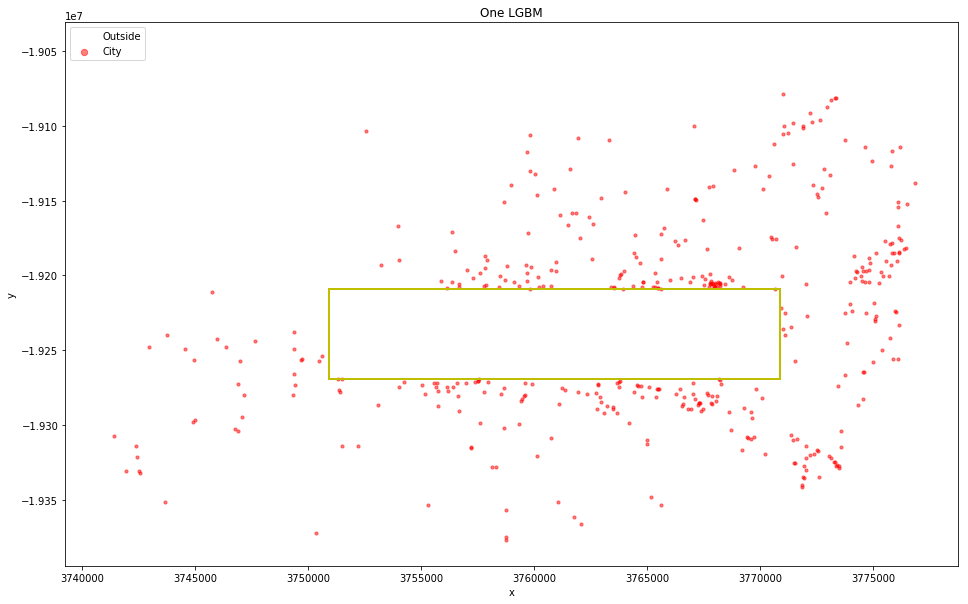

In [18]:
plotmap(city_lgbm,'One LGBM')

C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\J.K. Pawłowski\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


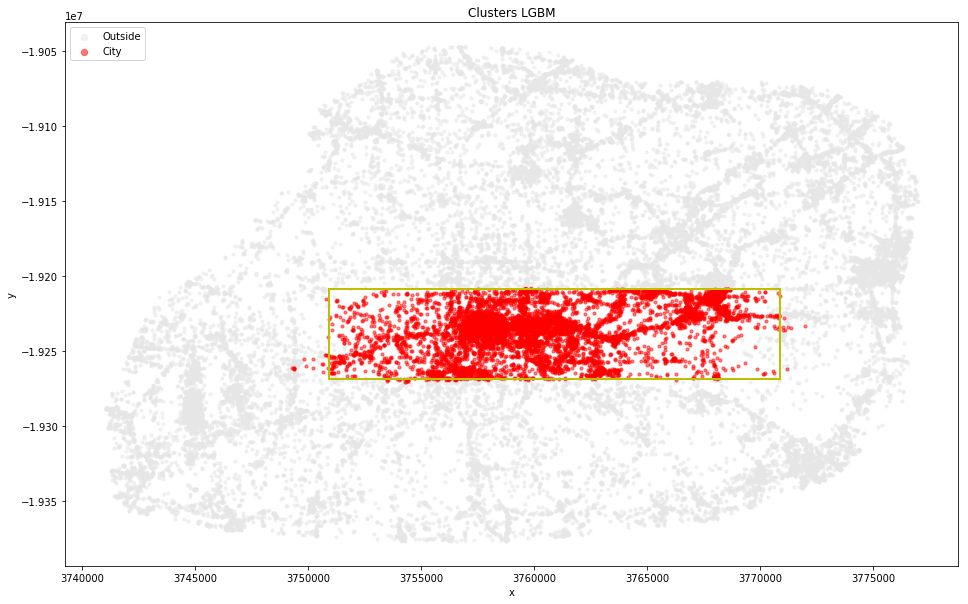

In [14]:
plotmap(city_proba,'Clusters LGBM')

In [15]:
if devide_clusters:
    plotmap(city_lgbm_c,'Clusters LGBM')

In [16]:
if devide_clusters:
    plotmap(city,'Submission outside the sqrt')